# CA1_MachineLearning_HDip - Crop Yield Prediction

|  |  |
| --- | --- |
| Student Full Name | Swan Saung Lwin |
| Student Number | 2025282 |
| Module Title | Machine Learning-HDip in Data Analytics |
| Assessment Title | CA1 |
| Assessment Due Date | 18 April 2025 |
| Date of Submission | 18 April 2025 |

# Introduction

Agriculture plays the most important role in the world's economy and world’s food supply. Almost 45% of the population in the world lives in households where agricultural activities represent the main occupation of the head and a large share of this agriculture. (Masters et al., 2013). Therefore crop yield prediction and agricultural planning becomes more important for economic sustainability of farmers, securing food supplies, and also GDP growth for agriculture based countries. Traditional forecasting methods often struggle to handle the complexity of environmental and agronomic factors. Therefore, this project proposes a supervised machine learning approach to predict crop yield based on weather conditions, usage of pesticides and historical yield data for ASEAN countries which are similar in geographical traits, have an considerable gdp in agriculture.

# 1. Business Understanding

## 1.1. Problem Statement
Agricultural productivity is challenged by unpredictable factors such as climate change and pest infestations. Also the methods to deal with those situations vary in different areas of the world. As global demand for food rises, farmers and agricultural businesses must enhance productivity while managing environmental and economic risks.\
\
The use of a wide range of chemicals to destroy pests and weeds is an important aspect of agricultural practice in both developed and developing countries. Undoubtedly, this has increased crop yield and reduced postharvest losses. However, the expanded use of such pesticides expectedly results in residues in foods. (al-Saleh, 1994). At the same time, weather variabilities such as changes in rainfall, and temperature can significantly affect crop performance and make crop yield harder to predict.\
\
These uncertainties hinder effective planning and risk management, limiting the stakeholders’ ability to allocate resources, anticipate market trends and predicting yield. With a data-driven approach to find patterns within those uncertain variables, the agricultural businesses could be growing at incredible pace, helping the lives of everyone involved in the supply chain.

## 1.2. Objectives
The key objectives of this project are defined as follow
- develop a predictive model using different machine learning techniques to estimate crop yield based on weather conditions, pesticide usage, and historical yield data.
- identify the most influential features affecting crop yield to support better decision making.
- compare multiple machine learning algorithms to determine the most accurate and robust model for yield prediction.

# 2. Data Understanding

## 2.1. About Datasets

To predict crop yield based on weather conditions, pesticides and history of crop yield, I've collected datasets containing all the necessary information. The datasets contain information about pesticide usage in countries by year, average precipitation, average temperature, and historical yield data and agriculural land mass. Pesticides, and Yield data are collected from Food and Agriculture Organization of the United Nations (2025), Precipitation data is collected from Our World in Data (2025), and Temperature data is collected from Palinatx (2024) at Kaggle. I've referenced the datasets from Patel R. (2022) at Kaggle and collected the datasets from more updated sources.

As mentioned above, there are 4 datasets used in this project for predicting crop yield. They are
- Yield
- Pesticides
- Precipitation
- Temperature

I have listed the description of each dataset from the source website as below.

### 2.1.1 Yield
This dataset contains the historical yield data from 2000 to 2022, grouped by area and the crops they grew. The columns included in this dataset described as below
- Domain Code (Encoded number for Domain)
- Domain (The domain for which the data represents)
- Area Code (Encoded number for Area)
- Area (Country name)
- Element Code (Encoded number for the metric)
- Element (The measurement metric of the data)
- Item Code (Encoded number for each crops)
- Item (Crop names)
- Year Code (The year the data is from)
- Year (The year the data is from)
- Unit (Measurement unit of yield)
- Value (Yield value)

### 2.1.2. Pesticides
This dataset describes the amount of pesticides each area used by year. The columns included in this dataset described as below
- Domain Code (Encoded number for Domain)
- Domain (The domain for which the data represents)
- Area Code (Encoded number for Area)
- Area (Country name)
- Element Code (Encoded number for the metric)
- Element (The measurement metric of the data)
- Item Code (Encoded number for item used)
- Item (Item used)
- Year Code (The year the data is from)
- Year (The year the data is from)
- Unit (Measurement unit of pesticides)
- Value (Pesticides value)

### 2.1.3. Precipitation
This dataset contains information about average precipitation in each country by year. The columns included in this dataset described as below
- Entity (Country name)
- Code (Country Code)
- Year (The year the data is from)
- Annual precipitation (Average precipitation per year)

### 2.1.4. Temperature
This dataset showcases average temperature in each country by year. The columns included in this dataset described as below
- Country (Country name)
- Year (The year the data is from)
- Annual Mean (Average temperature per year)
- 5-yr smooth (5 year smooth temperature)
- Code (Country Code)

## 2.2. Merging Datasets
First I will merge the 4 datasets into 1 to analyze easier.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
df_yield = pd.read_csv("data/yield.csv")
df_pest = pd.read_csv("data/pesticides.csv")
df_rain = pd.read_csv("data/precipitation.csv")
df_temp = pd.read_csv("data/temperature.csv")

### 2.2.1. Preparing Yield Dataset

Let's look at yield dataset first.

In [21]:
df_yield.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2000,2000,kg/ha,1714.3
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2001,2001,kg/ha,1666.7
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2002,2002,kg/ha,2140.7
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2003,2003,kg/ha,2456.1
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2004,2004,kg/ha,1225.0


Some columns seem to represent only one value so let's check if it's right.\
I will define a function for it so that it can reused for other datasets as well.

In [23]:
def find_singular_value_columns(df):
    singular_value_columns = []
    print("Singular value columns")
    for column in df.columns.tolist():
        uniques = df[column].unique()
        if len(uniques) == 1:
            singular_value_columns.append(column)
            print(f"{column}: {uniques}")
    return singular_value_columns

In [24]:
columns_to_drop = find_singular_value_columns(df_yield)

Singular value columns
Domain Code: ['QCL']
Domain: ['Crops and livestock products']
Element Code: [5412]
Element: ['Yield']
Unit: ['kg/ha']


These columns will not be needed for training and analysis so let's remove them.\
Also Year and Year Code are presenting the same thing so let's remove Year Code.

In [26]:
columns_to_drop.append("Year Code")
df_yield.drop(columns_to_drop, axis=1, inplace=True)

I will also rename some columns for better readability.

In [28]:
rename_map = {
    "Area Code (M49)": "Country Code",
    "Area": "Country",
    "Item Code (CPC)": "Crop Code",
    "Item": "Crop",
    "Value": "Yield (kg/ha)"
}
df_yield.rename(rename_map, axis=1, inplace=True)

In [29]:
df_yield.head()

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha)
0,4,Afghanistan,1371.0,"Almonds, in shell",2000,1714.3
1,4,Afghanistan,1371.0,"Almonds, in shell",2001,1666.7
2,4,Afghanistan,1371.0,"Almonds, in shell",2002,2140.7
3,4,Afghanistan,1371.0,"Almonds, in shell",2003,2456.1
4,4,Afghanistan,1371.0,"Almonds, in shell",2004,1225.0


### 2.2.2. Preparing Pesticides Dataset

In [31]:
df_pest.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46
2,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2002,2002,kg/ha,0.47
3,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2003,2003,kg/ha,0.49
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2004,2004,kg/ha,0.51


Let's follow the same process as yield.

In [33]:
columns_to_drop = find_singular_value_columns(df_pest)

Singular value columns
Domain Code: ['RP']
Domain: ['Pesticides Use']
Element Code: [5159]
Element: ['Use per area of cropland']
Item Code: [1357]
Item: ['Pesticides (total)']
Unit: ['kg/ha']


In [34]:
columns_to_drop.append("Year Code")
df_pest.drop(columns_to_drop, axis=1, inplace=True)

In [35]:
rename_map = {
    "Area Code (M49)": "Country Code",
    "Area": "Country",
    "Value": "Pesticides (kg/ha)"
}
df_pest.rename(rename_map, axis=1, inplace=True)

In [36]:
df_pest.head()

,Country Code,Country,Year,Pesticides (kg/ha)
0,8,Albania,2000,0.44
1,8,Albania,2001,0.46
2,8,Albania,2002,0.47
3,8,Albania,2003,0.49
4,8,Albania,2004,0.51


Let's follow the same process as yield.

### 2.2.3. Preparing Rain Dataset

In [39]:
df_rain.head()

,Entity,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


The columns doesn't seem to contain singular value. However I will rename Entity to Country to follow the same naming convention and drop Code column.

In [41]:
df_rain.rename({"Entity": "Country"}, axis=1, inplace=True)

In [42]:
df_rain.drop(["Code"], axis=1, inplace=True)

In [43]:
df_rain.head()

,Country,Year,Annual precipitation
0,Afghanistan,1940,217.67816
1,Afghanistan,1941,196.80933
2,Afghanistan,1942,300.08905
3,Afghanistan,1943,345.60892
4,Afghanistan,1944,324.44350


### 2.2.4. Preparing Temperature Dataset

In [45]:
df_temp.head()

,Country,Year,Annual Mean,5-yr smooth,Code
0,Dominican Republic,1901,23.71,23.65,DOM
1,Dominican Republic,1902,23.40,23.52,DOM
2,Dominican Republic,1903,23.45,23.38,DOM
3,Dominican Republic,1904,23.03,23.26,DOM
4,Dominican Republic,1905,23.44,23.16,DOM


The columns doesn't seem to contain singular value. However I will rename Annual Mean to Annual Temperature and drop 5-yr smooth, Code column.

In [47]:
df_temp.rename({"Annual Mean": "Annual Temperature"}, axis=1, inplace=True)

In [48]:
df_temp.drop(["5-yr smooth", "Code"], axis=1, inplace=True)

In [49]:
df_temp.head()

,Country,Year,Annual Temperature
0,Dominican Republic,1901,23.71
1,Dominican Republic,1902,23.40
2,Dominican Republic,1903,23.45
3,Dominican Republic,1904,23.03
4,Dominican Republic,1905,23.44


### 2.2.5. Merging Prepared Datasets

By initially looking at the data, the first thing I noticed is the differences in starting years. The most recent year is 1901 for temperature dataset and 1940 for rain dataset. I will discard the rows with the earlier years from other datasets when merging. Let's confirm if my most recent year assumption is right or not.

In [52]:
earliest_year_yield = df_yield["Year"].min()
earliest_year_pest = df_pest["Year"].min()
earliest_year_rain = df_rain["Year"].min()
earliest_year_temp = df_temp["Year"].min()
most_recent_earliest_year = np.max([earliest_year_yield, earliest_year_pest, earliest_year_rain, earliest_year_temp])
print(f"Most recent earliest year: {most_recent_earliest_year}")

Most recent earliest year: 2000


My assumption is correct. So, let's also check the earliest latest year for all the datasets.

In [54]:
latest_year_yield = df_yield["Year"].max()
latest_year_pest = df_pest["Year"].max()
latest_year_rain = df_rain["Year"].max()
latest_year_temp = df_temp["Year"].max()
earliest_latest_year = np.min([latest_year_yield, latest_year_pest, latest_year_rain, latest_year_temp])
print(f"Earliest latest year: {earliest_latest_year}")

Earliest latest year: 2022


I will use these to leverage the years to start from 2000 and end at 2022 after merging data.

I will merging the data on Country and Year so it's also important to look at Country to see if there's any differences in values or not. If there's any differences, I need to remove them as they might result in NaN values in measures for those specific countries.

In [57]:
countries_yield = df_yield["Country"].unique()
countries_pest = df_pest["Country"].unique()
countries_rain = df_rain["Country"].unique()
countries_temp = df_temp["Country"].unique()

countries = set(countries_yield)
countries_dfs = [countries_pest, countries_rain, countries_temp]

In [58]:
countries_diff = set()

for df in countries_dfs:
    diff = list(set(countries) - set(df)) + list(set(df) - set(countries))
    countries_diff.update(diff)
    countries.update(df)
    
countries_diff, len(countries_diff)

({'Afghanistan',
  'American Samoa',
  'Andorra',
  'Anguilla',
  'Antigua and Barbuda',
  'Ascension, Saint Helena and Tristan da Cunha',
  'Bahamas',
  'Bahamas,',
  'Barbados',
  'Bolivia',
  'Bolivia (Plurinational State of)',
  'Bosnia and Herzegovina',
  'British Virgin Islands',
  'Brunei',
  'Brunei Darussalam',
  'Burkina Faso',
  'Cabo Verde',
  'Cape Verde',
  'Cayman Islands',
  'China',
  'China, Hong Kong SAR',
  'China, Macao SAR',
  'China, Taiwan Province of',
  'China, mainland',
  'Congo',
  'Congo, Dem. Rep.',
  'Cook Islands',
  "Cote d'Ivoire",
  'Czechia',
  "Côte d'Ivoire",
  "Democratic People's Republic of Korea",
  'Democratic Republic of Congo',
  'Democratic Republic of the Congo',
  'Dominica',
  'East Timor',
  'El Salvador',
  'Equatorial Guinea',
  'Falkland Islands',
  'Faroe Islands',
  'French Guiana',
  'French Polynesia',
  'Gambia,',
  'Greenland',
  'Grenada',
  'Guadeloupe',
  'Guam',
  'Guinea Bissau',
  'Guinea-Bissau',
  'Guyana',
  'Heard Is

There are 169 countries that is not present in some of the datasets. Some countries are not present while some are spelled differently. I will replace only ASEAN countries spelled differently with the official names from UN before merging and remove others after merging all the datatsets.

In [60]:
countries_replace = {
    "Brunei": "Brunei Darussalam",
    "Laos": "Lao People's Democratic Republic",
    "Vietnam": "Viet Nam"
}

I will only be applying replace on Rain and Temp as Yield and Pest is collected from UN and already followed the naming conventions.

In [62]:
df_rain["Country"] = df_rain["Country"].replace(countries_replace)
df_temp["Country"] = df_temp["Country"].replace(countries_replace)

In [63]:
countries_yield = df_yield["Country"].unique()
countries_pest = df_pest["Country"].unique()
countries_rain = df_rain["Country"].unique()
countries_temp = df_temp["Country"].unique()

countries = set(countries_yield)
countries_dfs = [countries_pest, countries_rain, countries_temp]

countries_diff = set()

for df in countries_dfs:
    diff = list(set(countries) - set(df)) + list(set(df) - set(countries))
    countries_diff.update(diff)
    countries.update(df)
    
countries_diff, len(countries_diff)

({'Afghanistan',
  'American Samoa',
  'Andorra',
  'Anguilla',
  'Antigua and Barbuda',
  'Ascension, Saint Helena and Tristan da Cunha',
  'Bahamas',
  'Bahamas,',
  'Barbados',
  'Bolivia',
  'Bolivia (Plurinational State of)',
  'Bosnia and Herzegovina',
  'British Virgin Islands',
  'Brunei Darussalam',
  'Burkina Faso',
  'Cabo Verde',
  'Cape Verde',
  'Cayman Islands',
  'China',
  'China, Hong Kong SAR',
  'China, Macao SAR',
  'China, Taiwan Province of',
  'China, mainland',
  'Congo',
  'Congo, Dem. Rep.',
  'Cook Islands',
  "Cote d'Ivoire",
  'Czechia',
  "Côte d'Ivoire",
  "Democratic People's Republic of Korea",
  'Democratic Republic of Congo',
  'Democratic Republic of the Congo',
  'Dominica',
  'East Timor',
  'El Salvador',
  'Equatorial Guinea',
  'Falkland Islands',
  'Faroe Islands',
  'French Guiana',
  'French Polynesia',
  'Gambia,',
  'Greenland',
  'Grenada',
  'Guadeloupe',
  'Guam',
  'Guinea Bissau',
  'Guinea-Bissau',
  'Guyana',
  'Heard Island and McD

Even though I replaced Viet Nam, Brunei Darussalam and Lao People's Democratic Republic are still not present in one of the datasets so they will be removed.

In [65]:
print(f"Yield {df_yield.shape}")
print(f"Pest {df_pest.shape}")
print(f"Rain {df_rain.shape}")
print(f"Temp {df_temp.shape}")

Yield (206518, 6)
Pest (4536, 4)
Rain (16575, 3)
Temp (20740, 3)


Yield might be the best one to start merging on left outer join because it contains all the crop information and the most rows. Let's merge all the datasets.

In [67]:
df_yield_merged = pd.merge(df_yield, df_pest, how="left", on=["Country", "Country Code", "Year"])
df_yield_merged.head()

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha),Pesticides (kg/ha)
0,4,Afghanistan,1371.0,"Almonds, in shell",2000,1714.3,NaN
1,4,Afghanistan,1371.0,"Almonds, in shell",2001,1666.7,NaN
2,4,Afghanistan,1371.0,"Almonds, in shell",2002,2140.7,NaN
3,4,Afghanistan,1371.0,"Almonds, in shell",2003,2456.1,NaN
4,4,Afghanistan,1371.0,"Almonds, in shell",2004,1225.0,NaN


In [68]:
df_yield_merged = pd.merge(df_yield_merged, df_rain, how="left", on=["Country", "Year"])
df_yield_merged.head()

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation
0,4,Afghanistan,1371.0,"Almonds, in shell",2000,1714.3,NaN,219.97485
1,4,Afghanistan,1371.0,"Almonds, in shell",2001,1666.7,NaN,203.18445
2,4,Afghanistan,1371.0,"Almonds, in shell",2002,2140.7,NaN,304.83197
3,4,Afghanistan,1371.0,"Almonds, in shell",2003,2456.1,NaN,350.29400
4,4,Afghanistan,1371.0,"Almonds, in shell",2004,1225.0,NaN,315.41003


In [69]:
df_yield_merged = pd.merge(df_yield_merged, df_temp, how="left", on=["Country", "Year"])
df_yield_merged.head()

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
0,4,Afghanistan,1371.0,"Almonds, in shell",2000,1714.3,NaN,219.97485,13.46
1,4,Afghanistan,1371.0,"Almonds, in shell",2001,1666.7,NaN,203.18445,13.80
2,4,Afghanistan,1371.0,"Almonds, in shell",2002,2140.7,NaN,304.83197,13.61
3,4,Afghanistan,1371.0,"Almonds, in shell",2003,2456.1,NaN,350.29400,13.11
4,4,Afghanistan,1371.0,"Almonds, in shell",2004,1225.0,NaN,315.41003,13.87


Let's see how many rows are there after merging.

In [71]:
df_yield_merged.shape

(206518, 9)

It looks like the year also leveraged from joining. Let's leverage Country to clean up the data.

Year leveraging works well so now let's do it for Country.

In [74]:
df_yield_merged = df_yield_merged[~df_yield_merged["Country"].isin(countries_diff)].reset_index(drop=True)
df_yield_merged

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
0,8,Albania,1341.0,Apples,2000,5217.4,0.44,994.61870,12.73
1,8,Albania,1341.0,Apples,2001,7268.3,0.46,1179.96900,12.46
2,8,Albania,1341.0,Apples,2002,7022.2,0.47,1286.10830,12.54
3,8,Albania,1341.0,Apples,2003,5541.7,0.49,1195.52650,12.41
4,8,Albania,1341.0,Apples,2004,5000.0,0.51,1518.79700,12.10
...,...,...,...,...,...,...,...,...,...
137669,716,Zimbabwe,111.0,Wheat,2018,2717.8,0.65,692.69950,22.09
137670,716,Zimbabwe,111.0,Wheat,2019,3914.9,0.69,608.31180,22.37
137671,716,Zimbabwe,111.0,Wheat,2020,4779.6,0.67,814.14435,21.93
137672,716,Zimbabwe,111.0,Wheat,2021,5075.9,0.70,788.98170,21.87


With all the leveraging done, the merged dataset is left with about 137k rows with 9 columns.

## 2.3. Exploratory Data Analysis

### 2.3.1. Data Cleaning

In this project, I only want to focus on ASEAN countries which are similar in geographical traits, weather and the crops they grow.

In [79]:
# official members of asean
asean_countries = [
    "Brunei Darussalam",
    "Cambodia",
    "Indonesia",
    "Lao People's Democratic Republic",
    "Malaysia",
    "Myanmar",
    "Philippines",
    "Singapore",
    "Thailand",
    "Viet Nam"
]
df_yield_asean = df_yield_merged[df_yield_merged["Country"].isin(asean_countries)].reset_index(drop=True)

In [80]:
df_yield_asean.head()

,Country Code,Country,Crop Code,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
0,116,Cambodia,1312.0,Bananas,2000,4751.7,0.12,2028.7972,27.09
1,116,Cambodia,1312.0,Bananas,2001,4233.2,0.11,1754.6950,27.28
2,116,Cambodia,1312.0,Bananas,2002,4231.9,0.11,1693.5887,27.38
3,116,Cambodia,1312.0,Bananas,2003,4242.4,0.11,1776.3097,27.30
4,116,Cambodia,1312.0,Bananas,2004,4187.5,0.11,1522.2784,27.29


I will remove the Country Code and Crop Code columns as they will not be usable during both analysis and training stages.

In [82]:
df_yield_asean.drop(["Country Code", "Crop Code"], axis=1, inplace=True)
df_yield_asean.head()

,Country,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
0,Cambodia,Bananas,2000,4751.7,0.12,2028.7972,27.09
1,Cambodia,Bananas,2001,4233.2,0.11,1754.6950,27.28
2,Cambodia,Bananas,2002,4231.9,0.11,1693.5887,27.38
3,Cambodia,Bananas,2003,4242.4,0.11,1776.3097,27.30
4,Cambodia,Bananas,2004,4187.5,0.11,1522.2784,27.29


In [83]:
df_yield_asean.shape

(8204, 7)

There are currently 7 columns with about 8,200 rows.

In [85]:
df_yield_asean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8204 entries, 0 to 8203
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               8204 non-null   object 
 1   Crop                  8204 non-null   object 
 2   Year                  8204 non-null   int64  
 3   Yield (kg/ha)         8204 non-null   float64
 4   Pesticides (kg/ha)    8204 non-null   float64
 5   Annual precipitation  8204 non-null   float64
 6   Annual Temperature    8204 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 448.8+ KB


It seems like the data is already cleaned up from joining and preparing the datasets.

Let's check if there's any duplicates in the columns.

In [88]:
df_yield_asean.duplicated().sum()

0

Looks like the dataset is already cleaned up so let's look at some information about the dataset.

In [90]:
df_yield_asean.describe()

,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
count,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,2011.035958,8783.509617,3.456147,2440.508956,26.023912
std,6.642913,12485.245934,2.809970,636.796504,1.058921
min,2000.000000,52.800000,0.050000,1398.390400,23.460000
25%,2005.000000,1330.775000,1.370000,1892.481900,25.840000
50%,2011.000000,4855.200000,2.400000,2340.093300,26.270000
75%,2017.000000,11965.900000,5.490000,2979.463400,26.710000
max,2022.000000,131907.400000,13.870000,3773.515000,27.990000


By looking at the statistics, I noticed that standard deviation for Yield is high. It can be due to the fact that production number for each crop is different.

Let's see how many types of crops are there.

In [93]:
len(df_yield_asean["Crop"].unique())

99

There are 99 types of crops grown in ASEAN. Now I want to see which crops are having the most amount of yield.

### 2.3.2. Top 10 Crops in ASEAN

In [96]:
top10_crops = df_yield_asean[["Crop", "Yield (kg/ha)"]].groupby('Crop').mean().nlargest(10, "Yield (kg/ha)")

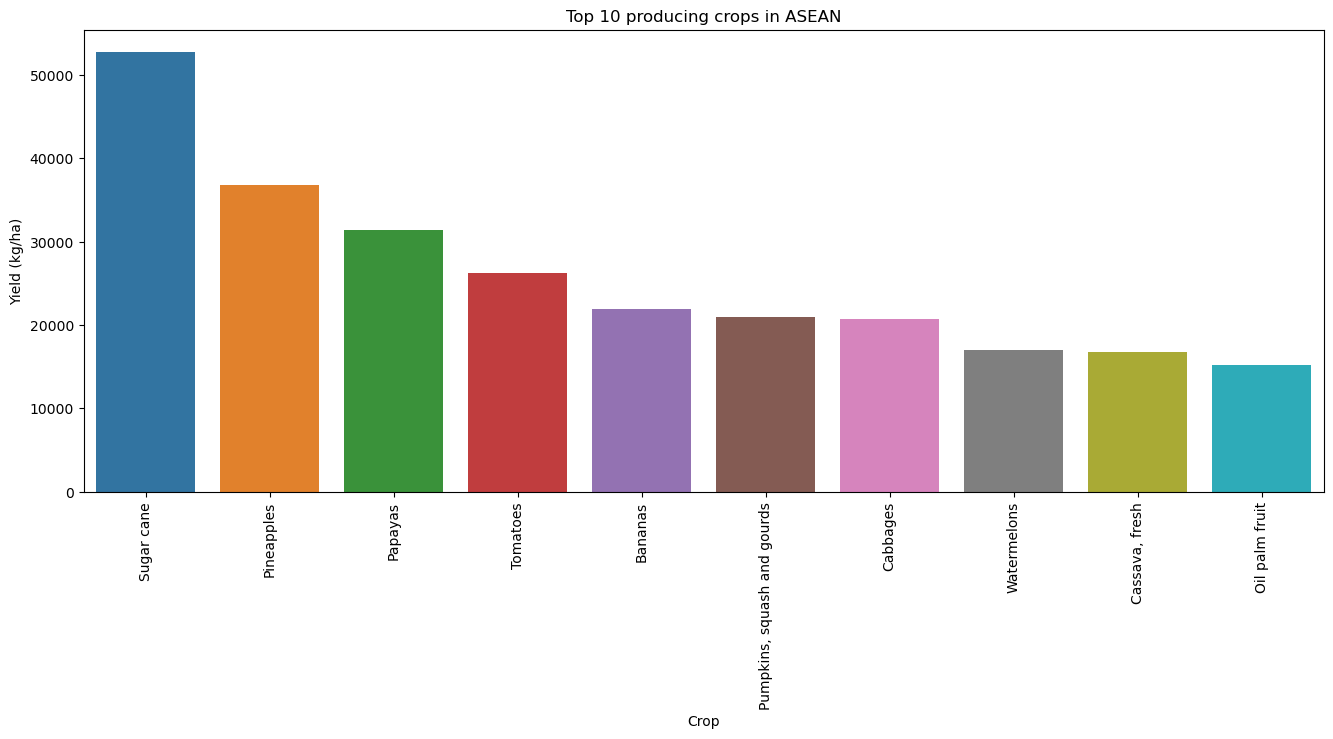

In [273]:
plt.figure(figsize=(16, 6))
plt.title("Top 10 producing crops in ASEAN")
sns.barplot(top10_crops, x="Crop", y="Yield (kg/ha)", hue="Crop")
plt.xticks(rotation=90)

plt.savefig('images/top10_crops_ASEAN.png', bbox_inches = 'tight')
plt.show()

Seems like Sugar cane, Pineapple and Papayas are significantly leading the production in ASEAN. This also has to do with the measurement as the unit is on kg/ha which favors heavier crops to be on top.\
In the south-east asia, rice is regarded as the main source of food. I want to know which countries in ASEAN are leading in average yield for rice.

### 2.3.3. Average Yield of Rice by Country

In [100]:
avg_rice_yield_by_country = (
    df_yield_asean[df_yield_asean["Crop"] == "Rice"][["Country", "Yield (kg/ha)"]]
        .groupby(['Country'])
        .mean()
        .sort_values(by=["Yield (kg/ha)"], ascending=False)
)
avg_rice_yield_by_country

,Yield (kg/ha)
Country,
Viet Nam,5314.995652
Indonesia,4914.295652
Myanmar,3809.721739
Philippines,3740.243478
Malaysia,3628.165217
Thailand,2974.443478
Cambodia,2836.734783


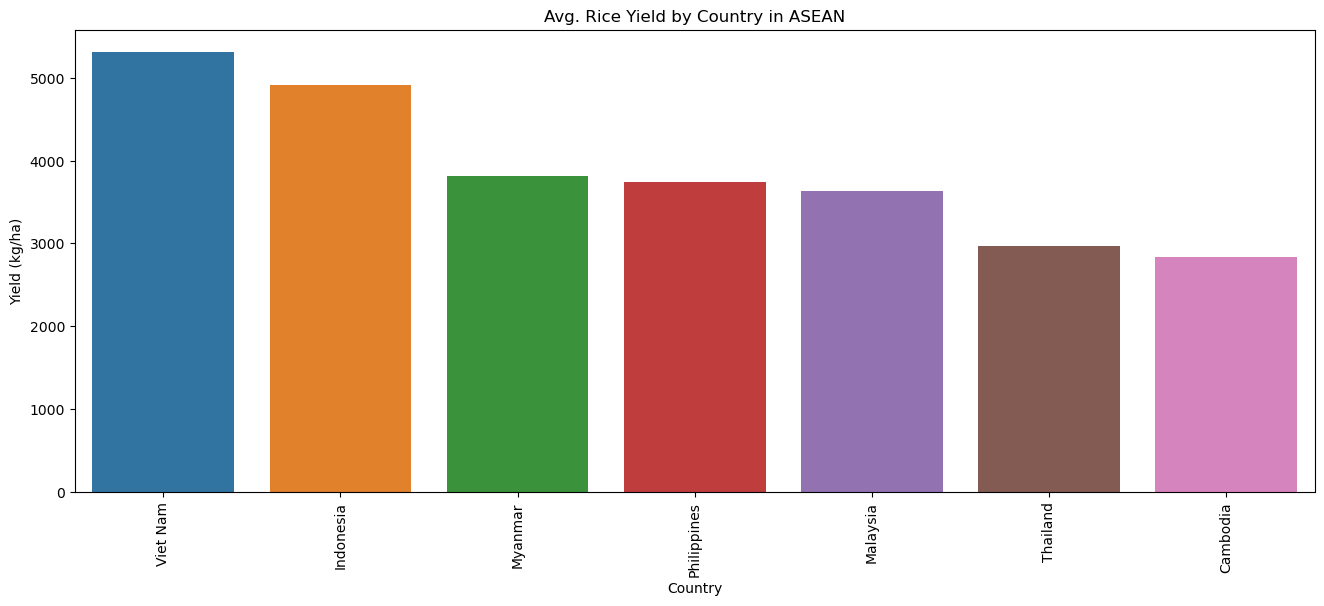

In [276]:
plt.figure(figsize=(16, 6))
plt.title("Avg. Rice Yield by Country in ASEAN")
sns.barplot(avg_rice_yield_by_country, x="Country", y="Yield (kg/ha)", hue="Country")
plt.xticks(rotation=90)

plt.savefig('images/avg_rice_yield_ASEAN.png', bbox_inches = 'tight')
plt.show()

Vietnam, and Indonesia have the best average yield (kg/ha) in ASEAN. Myanmar, Philipines, and Malaysia have almost the same with Thailand and Cambodia having the least average yeild per ha.

### 2.3.4. Correlation of Factors

I want to know how environmental factors and use of pesticides affect yield. Also the relation between the amount of pesticides used and the environmental factors.

In [105]:
metrics_columns = ["Yield (kg/ha)", "Pesticides (kg/ha)", "Annual precipitation", "Annual Temperature"]

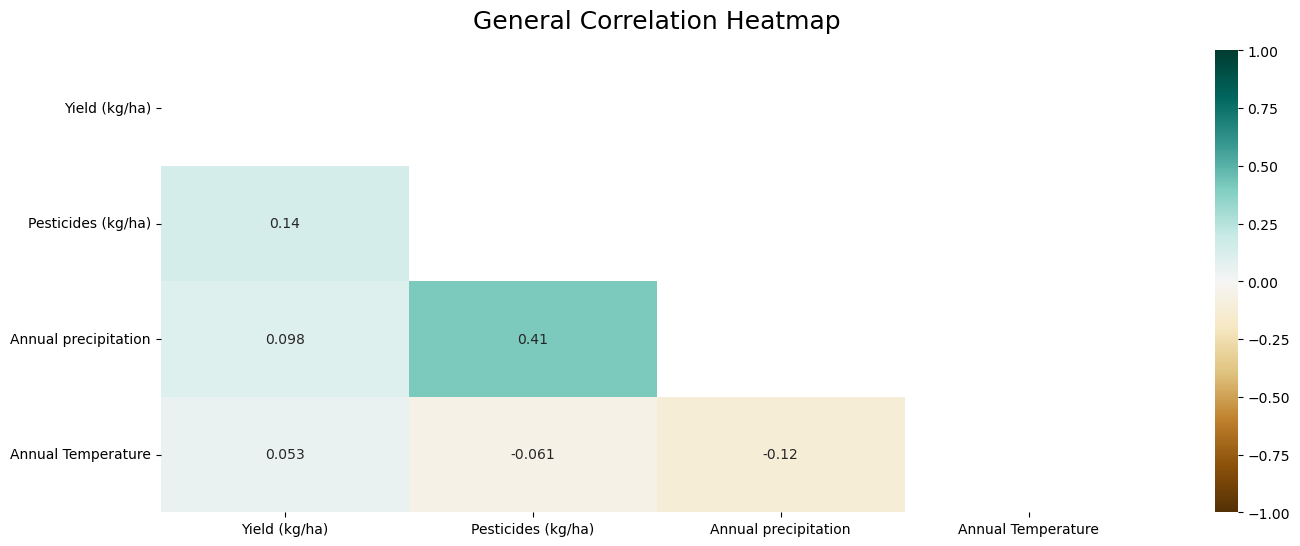

In [278]:
corr = df_yield_asean[metrics_columns].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('General Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('images/crops_general_correlation.png', bbox_inches = 'tight')
plt.show()

I found 2 interesting insights by looking at the correlation heatmap.
- The amount of pesticides used on crops depends moderately on the precipitation but only a negatively small amount on temperature.
- Yield isn't heavily influenced by any of the factors. The influences are small and similar to each other with the amount of pesticides used being the highest, followed by precipitation and finally temperature.

These correlation of factors could be different for different types of crops. According to article by Ijaz S. (2023), sugarcane, maize, rice, and wheat are most consumed crops in the world. Therefore, I want to see the correlation of factors for these crops.

#### 2.3.4.1. Sugarcane Correlation Heatmap

In [110]:
df_yield_sugarcane = df_yield_asean[df_yield_asean["Crop"] == "Sugar cane"]
df_yield_sugarcane.head()

,Country,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
644,Cambodia,Sugar cane,2000,21948.7,0.12,2028.7972,27.09
645,Cambodia,Sugar cane,2001,21910.4,0.11,1754.6950,27.28
646,Cambodia,Sugar cane,2002,22226.6,0.11,1693.5887,27.38
647,Cambodia,Sugar cane,2003,20408.5,0.11,1776.3097,27.30
648,Cambodia,Sugar cane,2004,19344.6,0.11,1522.2784,27.29


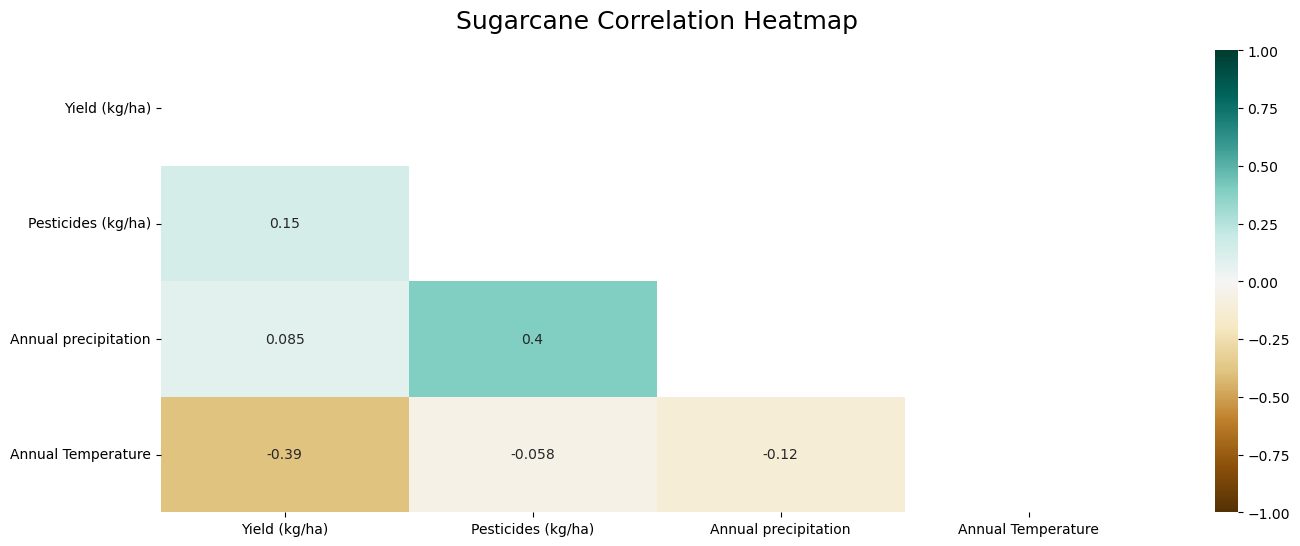

In [280]:
sugarcane_corr = df_yield_sugarcane[metrics_columns].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(sugarcane_corr, dtype=bool))
heatmap = sns.heatmap(sugarcane_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Sugarcane Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('images/sugarcane_correlation.png', bbox_inches = 'tight')
plt.show()

For sugarcane, pesticide usage, and precipitation doesn't really affect the production. Temperature has moderate negative influence on yield. Correlation of pesticides and the environmental factors remain the same as generalized heatmap.

#### 2.3.4.2. Maize Correlation Heatmap

In [114]:
df_yield_maize = df_yield_asean[df_yield_asean["Crop"] == "Maize (corn)"]
df_yield_maize.head()

,Country,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
253,Cambodia,Maize (corn),2000,2734.5,0.12,2028.7972,27.09
254,Cambodia,Maize (corn),2001,2761.2,0.11,1754.6950,27.28
255,Cambodia,Maize (corn),2002,2079.7,0.11,1693.5887,27.38
256,Cambodia,Maize (corn),2003,3747.2,0.11,1776.3097,27.30
257,Cambodia,Maize (corn),2004,3320.2,0.11,1522.2784,27.29


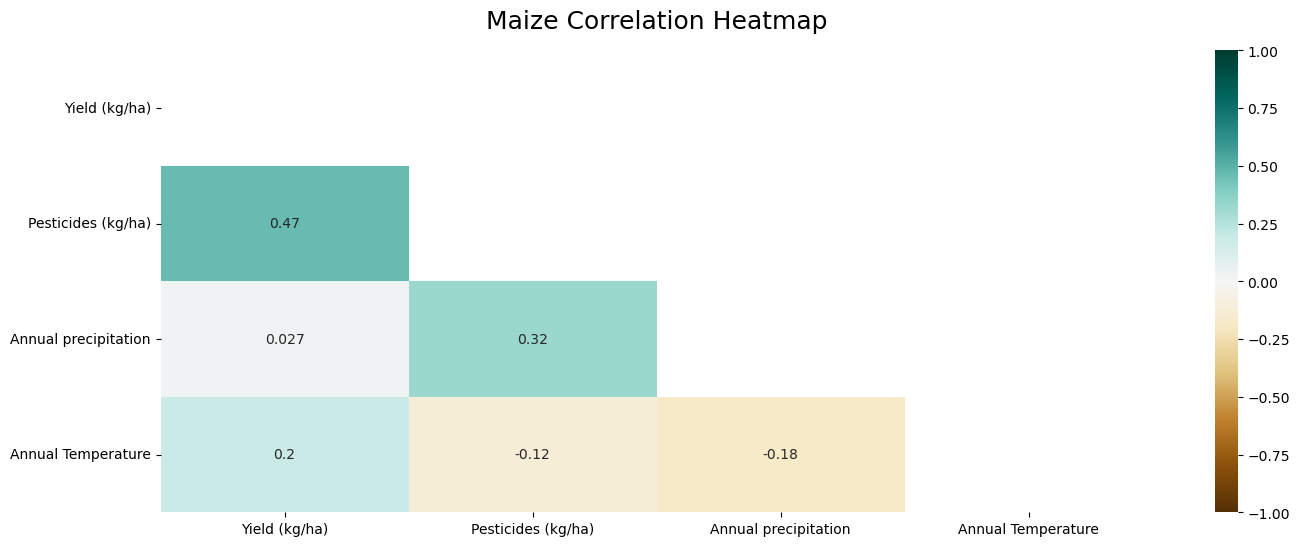

In [282]:
maize_corr = df_yield_maize[metrics_columns].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(maize_corr, dtype=bool))
heatmap = sns.heatmap(maize_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Maize Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('images/maize_correlation.png', bbox_inches = 'tight')
plt.show()

Yield of maize is moderately influenced by pesticide usage and lightly influnenced by temperature. Precipitation however have little to no influence on yield. Correlation of pesticides and the environmental factors are the same as generalized heatmap.

#### 2.3.4.3. Rice correlation heatmap

In [118]:
df_yield_rice = df_yield_asean[df_yield_asean["Crop"] == "Rice"]
df_yield_rice.head()

,Country,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
552,Cambodia,Rice,2000,2115.5,0.12,2028.7972,27.09
553,Cambodia,Rice,2001,2069.9,0.11,1754.6950,27.28
554,Cambodia,Rice,2002,1916.4,0.11,1693.5887,27.38
555,Cambodia,Rice,2003,2101.2,0.11,1776.3097,27.30
556,Cambodia,Rice,2004,1977.3,0.11,1522.2784,27.29


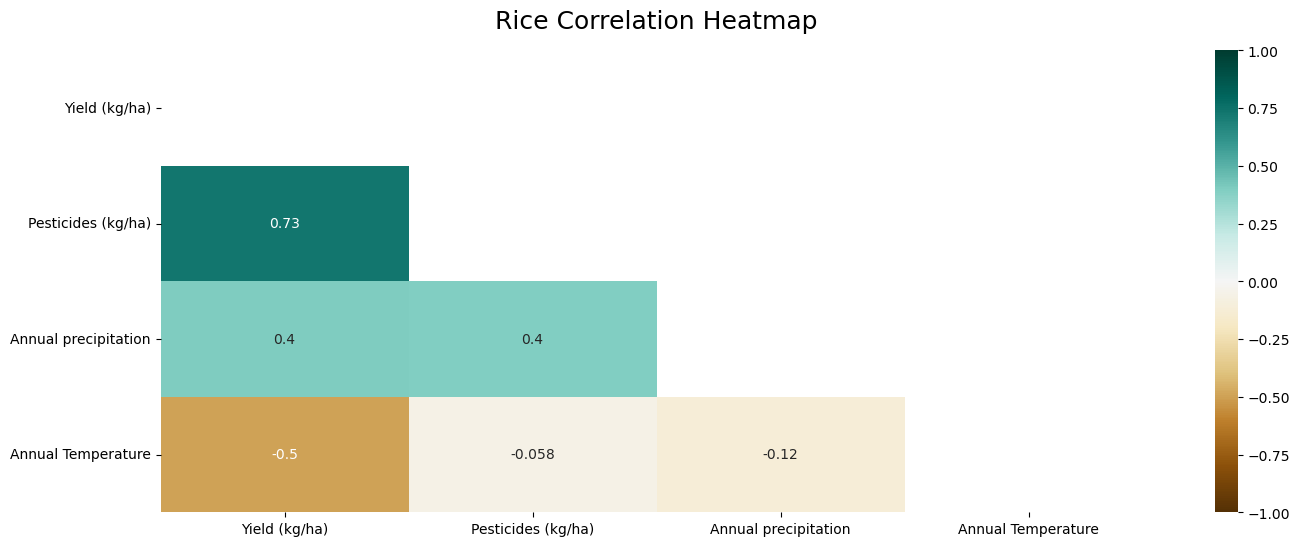

In [284]:
rice_corr = df_yield_rice[metrics_columns].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(rice_corr, dtype=bool))
heatmap = sns.heatmap(rice_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Rice Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('images/rice_correlation.png', bbox_inches = 'tight')
plt.show()

Seems like production of rice depends heavily on the amount of precipitation and moderately on pesticide usage. However high temperature seems to negative affect the amount of yield.

#### 2.3.4.4. Wheat Correlation Heatmap

In [122]:
df_yield_wheat = df_yield_asean[df_yield_asean["Crop"] == "Wheat"]
df_yield_wheat.head()

,Country,Crop,Year,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
4050,Myanmar,Wheat,2000,1149.4,0.05,2452.3535,23.46
4051,Myanmar,Wheat,2001,1190.2,0.07,2337.3142,23.87
4052,Myanmar,Wheat,2002,1267.9,0.09,2357.8060,23.80
4053,Myanmar,Wheat,2003,1287.0,0.08,2256.7163,23.74
4054,Myanmar,Wheat,2004,1393.5,0.10,2346.6582,23.59


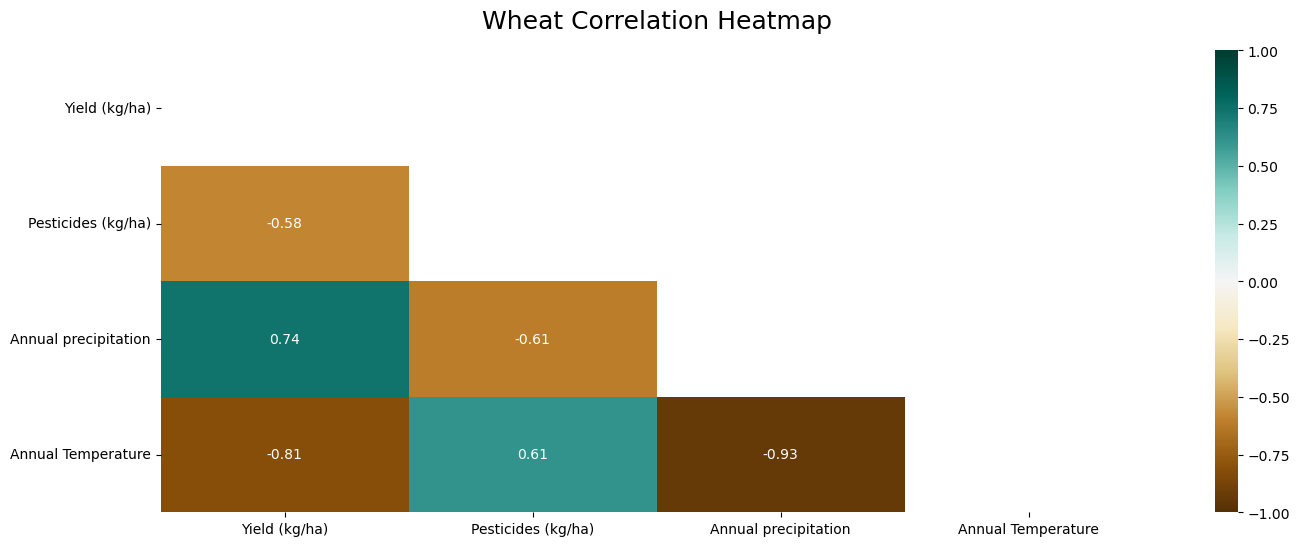

In [286]:
wheat_corr = df_yield_wheat[metrics_columns].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(wheat_corr, dtype=bool))
heatmap = sns.heatmap(wheat_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Wheat Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('images/wheat_correlation.png', bbox_inches = 'tight')
plt.show()

In the case of wheat, it is very different from the above three. Only the amount of precipitation is positively and highly influencing yield while the rise in temperature and pesticide usage are having high negative impact on yield. The usage of pesticide is also the different from other crops. Pesticide usage for wheat seems to be positively influenced by high temperature and negatively influenced high precipitation.

### 2.3.5. Distribution of values

Let's draw some boxplot to see the range of the data and whether there are some outliers or not. I will not include Yield column for this as I want to only look at the feature columns.

In [127]:
feature_metrics_columns = ["Pesticides (kg/ha)", "Annual precipitation", "Annual Temperature"]

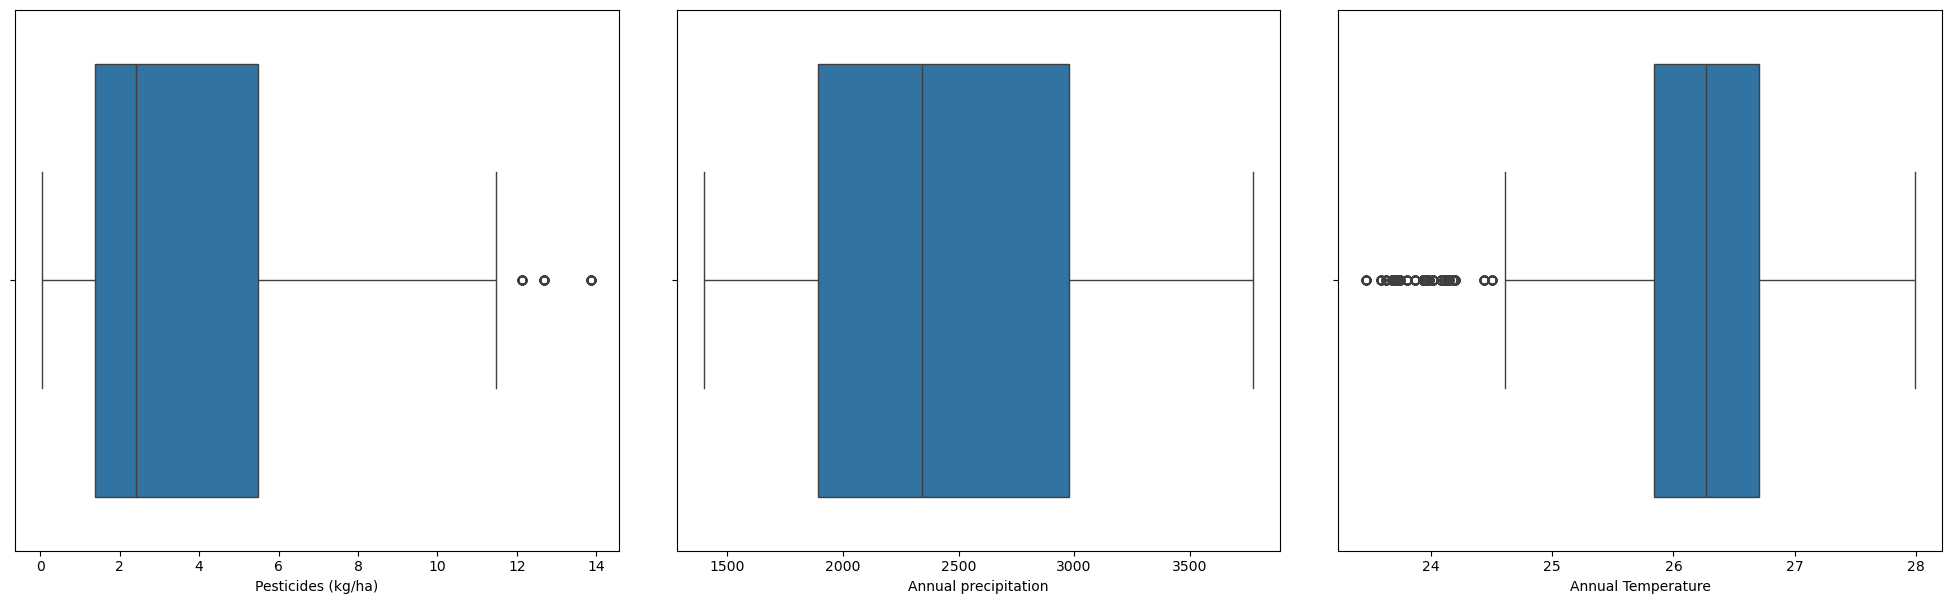

In [288]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 6)
fig.tight_layout()
for column, ax in zip(feature_metrics_columns, axes.flatten()):
    sns.boxplot(x=column, data=df_yield_asean, ax=ax)

plt.savefig('images/boxplots.png', bbox_inches = 'tight')
plt.show()

Temperature is having a high number of outliers. The numbers are too condensed within a certain range that any number that falls out of that range becomes an outlier. To solve the issue, I will be implementing feature scaling on the dataset after looking at the distributions.

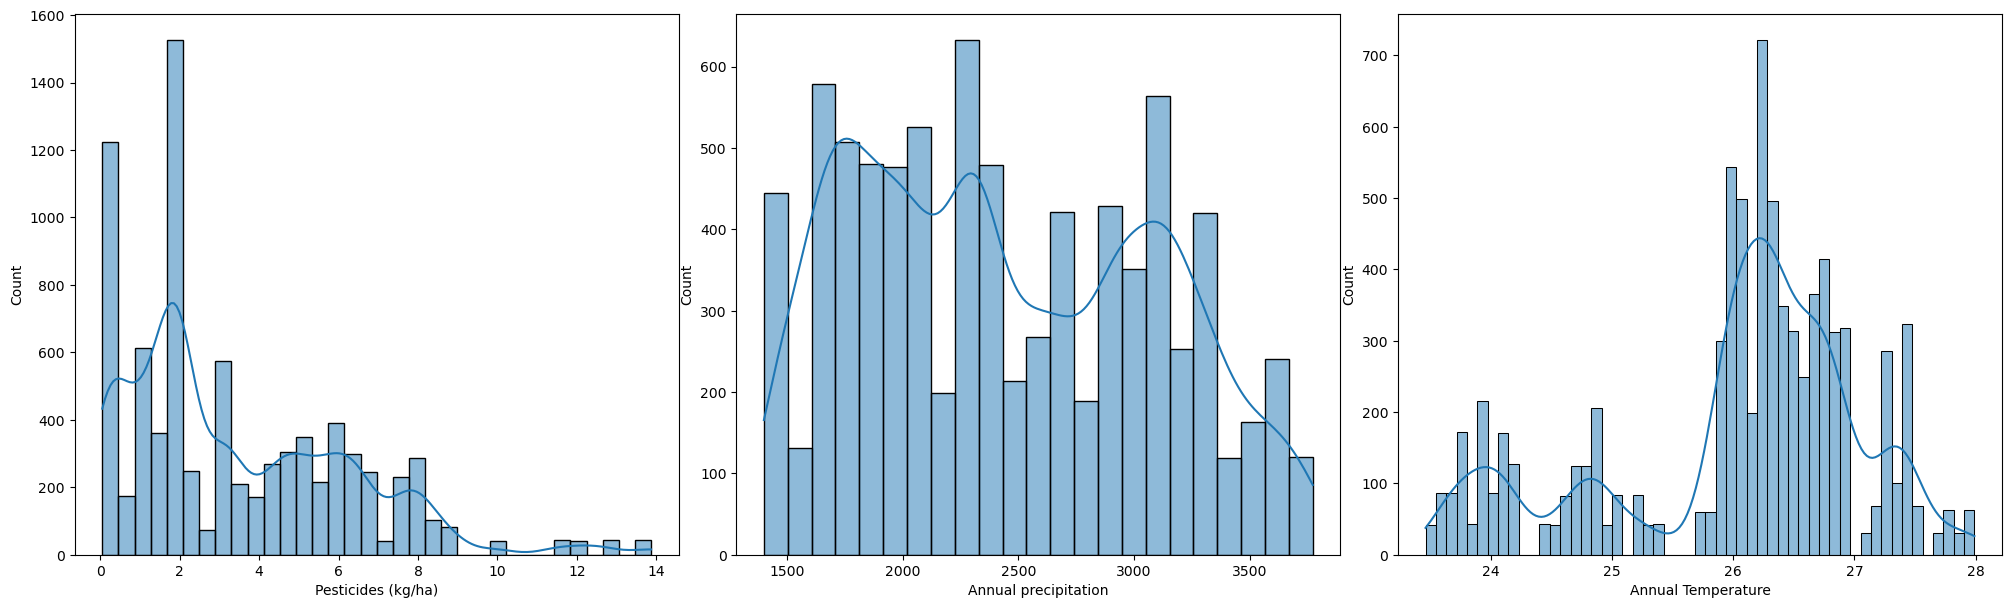

In [290]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 6)
fig.tight_layout()
for column, ax in zip(feature_metrics_columns, axes.flatten()):
    sns.histplot(x=column, data=df_yield_asean, kde=True, ax=ax)

plt.savefig('images/distributions.png', bbox_inches = 'tight')
plt.show()

Both pesticides and precipitation have uniform distributions. Distribution for temperature kind of resemble normal distribution with some number of outliers on the left.

# 3. Data Preparation

## 3.1. Dropping unnecessary columns

I will drop the year column as it is irrelevant for training the model.

In [135]:
df_yield_asean.drop(columns=["Year"], axis=1, inplace=True)
df_yield_asean.head()

,Country,Crop,Yield (kg/ha),Pesticides (kg/ha),Annual precipitation,Annual Temperature
0,Cambodia,Bananas,4751.7,0.12,2028.7972,27.09
1,Cambodia,Bananas,4233.2,0.11,1754.6950,27.28
2,Cambodia,Bananas,4231.9,0.11,1693.5887,27.38
3,Cambodia,Bananas,4242.4,0.11,1776.3097,27.30
4,Cambodia,Bananas,4187.5,0.11,1522.2784,27.29


## 3.2. Splitting Data

For training and testing the models, I will be initially testing with 3 splits (80-20, 90-10, 95-5). After looking comparing accuracies across 3 splits, I will choose one and proceed with it. However for preparing processing, I will be using 80-20 split and define functions to be flexible along the process with 3 splits.

In [138]:
splits = [0.05, 0.1, 0.2]

Let's split the data into training and testing before doing any of the preprocessing.

In [140]:
X = df_yield_asean.loc[:, df_yield_asean.columns != "Yield (kg/ha)"]
y = df_yield_asean["Yield (kg/ha)"]
X.shape, y.shape

((8204, 5), (8204,))

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6563, 5), (1641, 5), (6563,), (1641,))

## 3.3. Category Encoding

There are 2 categorical values in the dataset. To enable machine learning models to process the categorical data, the values have to be encoded. Let's see the number of unique values for these 2 columns to decide what kind of encoding method I should use.

In [144]:
len(X["Country"].unique()), len(X["Crop"].unique())

(7, 99)

I will avoid using label encoder as it will added ordinality to the variable and create bias upon training the models.

I will be applying one-hot encoding to Country values as it doesn't have much unique values. However I cannot apply one-hot encoding to Crop as it will create 97 features will face curse of dimensionality because of this. Therefore I will be applying target encoding to Crop. The main idea behind the target encoder is to encode the categories by replacing them for a measurement of the effect they might have on the target. The issue with target encoding is that information of target variable will be feeded. To solve that smoothing will be applied to the method.

In [147]:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import make_column_transformer

In [148]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train[["Country"]])

OneHotEncoder(handle_unknown='ignore')

In [149]:
ohe_values = encoder.transform(X_train[["Country"]])
encoded_values = pd.DataFrame(ohe_values.toarray(), columns=encoder.get_feature_names_out())
encoded_values.head()

,Country_Cambodia,Country_Indonesia,Country_Malaysia,Country_Myanmar,Country_Philippines,Country_Thailand,Country_Viet Nam
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [150]:
X_train.drop(columns=["Country"], axis=1, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, encoded_values], axis=1)
X_train.head()

,Crop,Pesticides (kg/ha),Annual precipitation,Annual Temperature,Country_Cambodia,Country_Indonesia,Country_Malaysia,Country_Myanmar,Country_Philippines,Country_Thailand,Country_Viet Nam
0,"Kenaf, and other textile bast fibres, raw or r...",8.05,3773.5150,26.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Castor oil seeds,0.10,2346.6582,23.59,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Papayas,1.45,1713.4440,26.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Other nuts (excluding wild edible nuts and gro...,7.15,2375.5344,24.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Tea leaves,3.89,1979.6188,24.80,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [151]:
# apply first to training and testing data before training or testing
def one_hot_encode_transform(X, encoder, fit=False):
    if fit:
        encoder.fit(X[["Country"]])
    ohe_values = encoder.transform(X[["Country"]])
    encoded_values = pd.DataFrame(ohe_values.toarray(), columns=encoder.get_feature_names_out())
    X.drop(columns=["Country"], axis=1, inplace=True)
    X.reset_index(drop=True, inplace=True)
    X = pd.concat([X, encoded_values], axis=1)
    return X, encoder

In [152]:
target_enc = TargetEncoder(smooth="auto")
target_enc.fit(X_train[["Crop"]], y_train)

TargetEncoder()

In [153]:
te_values = target_enc.transform(X_train[["Crop"]])
te_df = pd.DataFrame(te_values, columns=target_enc.get_feature_names_out())
te_df.head()

,Crop
0,1919.234787
1,719.102064
2,31188.157083
3,1578.930334
4,4724.806642


In [154]:
X_train.drop(columns=["Crop"], axis=1, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, te_df], axis=1)
X_train.head()

,Pesticides (kg/ha),Annual precipitation,Annual Temperature,Country_Cambodia,Country_Indonesia,Country_Malaysia,Country_Myanmar,Country_Philippines,Country_Thailand,Country_Viet Nam,Crop
0,8.05,3773.5150,26.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1919.234787
1,0.10,2346.6582,23.59,0.0,0.0,0.0,1.0,0.0,0.0,0.0,719.102064
2,1.45,1713.4440,26.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,31188.157083
3,7.15,2375.5344,24.84,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1578.930334
4,3.89,1979.6188,24.80,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4724.806642


In [155]:
# apply second to training and testing data before training or testing
def target_encode_transform(X, encoder, y=None, fit=False):
    if fit:
        target_enc.fit(X[["Crop"]], y)
    te_values = target_enc.transform(X[["Crop"]])
    te_df = pd.DataFrame(te_values, columns=target_enc.get_feature_names_out())
    X.drop(columns=["Crop"], axis=1, inplace=True)
    X.reset_index(drop=True, inplace=True)
    X = pd.concat([X, te_df], axis=1)
    return X, encoder

## 3.4. Feature Scaling

To avoid features with highly varying magnitude impacting the models' performance, I will be doing feature scaling using the min-max scaler.

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
scaler = MinMaxScaler()
scaler.fit(X_train) 

MinMaxScaler()

In [160]:
scaled_values = scaler.transform(X_train)
X_train = pd.DataFrame(scaled_values, columns=X_train.columns)
X_train.head()

,Pesticides (kg/ha),Annual precipitation,Annual Temperature,Country_Cambodia,Country_Indonesia,Country_Malaysia,Country_Myanmar,Country_Philippines,Country_Thailand,Country_Viet Nam,Crop
0,0.578871,1.000000,0.582781,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.032734
1,0.003618,0.399250,0.028698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.009852
2,0.101302,0.132647,0.717439,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.590776
3,0.513748,0.411407,0.304636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.026246
4,0.277858,0.244715,0.295806,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.086225


In [161]:
# apply third to training and testing data before training or testing
def scale_transform(X, scaler, fit=False):
    if fit:
        scaler.fit(X)
    scaled_values = scaler.transform(X)
    X = pd.DataFrame(scaled_values, columns=X.columns)
    return X, scaler

# 4. Modeling

To predict crop yield, I have chosen a wide range of models. \
I've chosen 3 types of tree-based algorithms, Random Forest, Gradient Boosting and XGBoost. I've also chosen Support Vector Machine and Ridge as a type of Linear Regression.\
My modeling strategy would be as follows.
1. Cross-validate the above described models on 3 splits (80-20, 90-10, and 95-5).
2. Test the models on 3 splits and select the best performing models together with the best performing split.
3. Tune 3 best models using GridSearchCV on chosen split.
4. Train the models with the best parameters on chosen split.

## 4.1. Cross-validation on 3 splits

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.metrics import root_mean_squared_error, r2_score

In [166]:
models = []

models.append(('GBR', GradientBoostingRegressor(random_state=28)))
models.append(('RFR', RandomForestRegressor(random_state=28)))
models.append(('XGB', XGBRegressor(random_state=28)))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('LR', Ridge(random_state=28)))

I will be evaluating the models based on 2 metrics, Root Mean Square Error (RMSE) and R2 score.\
**Root Mean Square Error (RMSE)** shows the mean differences between actual and predicted values in the dataset in the unit of target variable.\
**R-Squared Score (R2)** is a measure that provides information about the goodness fit of a model. It is the statistical measure of how well the regression line fit the model.

To evaluate the models, it is also important to understand the concepts of Generalization, Underfitting and Overfitting.\
**Generalization** is the model's ability to understand and apply learned patterns to unseen data. Models with low variance also tend to underfit as they are too simple to capture complex patterns. However, low-bias models might overfit if they are too flexible. (IBM, 2024).\
**Overfitting** means that there are less error during training but when testing with unseen data, the amount of error is significantly higher. An overfit model can result in high model accuracy on training data but low accuracy on new data due to memorization instead of generalization\
**Underfitting** describes the situation where performance of a model is bad and errors are significantly high across both training and testing datasets.

In [169]:
scoring = {'rmse' : 'neg_root_mean_squared_error', 'r2_score' : 'r2'}
training_3split_results = []

for split in splits:
    print(f"{int((1-split) * 100)}-{int(split * 100)} Split Training Accuracy")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=27)

    training_results = []

    oh_encoder = OneHotEncoder(handle_unknown='ignore')
    target_encoder = TargetEncoder(smooth="auto")
    scaler = MinMaxScaler()

    X_train, oh_encoder = one_hot_encode_transform(X_train, oh_encoder, fit=True)
    X_train, target_encoder = target_encode_transform(X_train,  target_encoder, y=y_train, fit=True)
    X_train, scaler = scale_transform(X_train, scaler, fit=True)
    
    for name, model in models:
        scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
        rmse = np.mean(-scores["test_rmse"])
        r2 = np.mean(scores["test_r2_score"])
        training_results.append([name, rmse, r2])

    training_results_df = pd.DataFrame(training_results, columns=["Model", "RMSE Score", "R² Score"])
    training_3split_results.append(training_results_df)
    print(training_results_df)

95-5 Split Training Accuracy
  Model    RMSE Score  R² Score
0   GBR   5056.047621  0.836177
1   RFR   2916.581971  0.945852
2   XGB   3019.653199  0.942012
3   SVR  13088.570608 -0.089818
4   KNN   5352.953406  0.814818
5    LR   7442.592659  0.648077
90-10 Split Training Accuracy
  Model    RMSE Score  R² Score
0   GBR   5100.106306  0.838126
1   RFR   2958.425783  0.945710
2   XGB   3076.401471  0.941360
3   SVR  13249.560897 -0.090339
4   KNN   5296.527117  0.824934
5    LR   7509.102941  0.650425
80-20 Split Training Accuracy
  Model    RMSE Score  R² Score
0   GBR   5024.469966  0.846741
1   RFR   3132.055630  0.940441
2   XGB   3149.409200  0.939619
3   SVR  13451.241077 -0.088278
4   KNN   5503.462376  0.817110
5    LR   7684.805973  0.644295


Upon looking at the training accuracy, Random Forest and XGBoost are having the best r2 score of around 94% and GradientBoosting and KNN are having a decent accuracy of 83%. Ridge Regression doesn't perform very well with about 64% while Support Vector Machine is clearly underfitting.\
All 3 splits have similar accuracies, so I will deciding which split to choose on seeing the testing results.

## 4.2. Testing on 3 splits

Let's see how the models perform with testing dataset.

In [173]:
testing_3split_results = []

for split in splits:
    print(f"{int((1-split) * 100)}-{int(split * 100)} Split Testing Accuracy")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=27)

    predictions = {}
    testing_results = []

    oh_encoder = OneHotEncoder(handle_unknown='ignore')
    target_encoder = TargetEncoder(smooth="auto")
    scaler = MinMaxScaler()

    X_train, oh_encoder = one_hot_encode_transform(X_train, oh_encoder, fit=True)
    X_train, target_encoder = target_encode_transform(X_train, target_encoder, y=y_train, fit=True)
    X_train, scaler = scale_transform(X_train, scaler, fit=True)

    X_test, _ = one_hot_encode_transform(X_test, oh_encoder)
    X_test, _ = target_encode_transform(X_test,  target_encoder, y=y_test)
    X_test, _ = scale_transform(X_test, scaler)
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[name] = y_pred
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        testing_results.append([name, rmse, r2])
    
    testing_results_df = pd.DataFrame(testing_results, columns=["Model", "RMSE Score", "R² Score"])
    testing_3split_results.append(testing_results_df)
    print(testing_results_df)

95-5 Split Testing Accuracy
  Model    RMSE Score  R² Score
0   GBR   4493.713515  0.805790
1   RFR   2669.073511  0.931485
2   XGB   2850.535773  0.921853
3   SVR  10457.193449 -0.051700
4   KNN   4381.653720  0.815355
5    LR   5933.322363  0.661423
90-10 Split Testing Accuracy
  Model    RMSE Score  R² Score
0   GBR   4743.941765  0.777049
1   RFR   2766.412250  0.924183
2   XGB   2909.815531  0.916119
3   SVR  10330.011676 -0.057139
4   KNN   5074.735906  0.744872
5    LR   6196.843140  0.619573
80-20 Split Testing Accuracy
  Model    RMSE Score  R² Score
0   GBR   4741.252313  0.794908
1   RFR   2460.833437  0.944751
2   XGB   2837.948694  0.926520
3   SVR  10807.619124 -0.065667
4   KNN   5286.930012  0.744983
5    LR   6212.596507  0.647866


Random Forest and XGBoost have drop off a little bit of r2 score but no enough to be called overfitting. However, GradientBoosting has about than 5% drop off in r2 score and can said to be a little bit overfitted.\
Looking at the 3 splits, 90-10 seem to be the worst of all. To choose from 95-5 and 80-20, I will mainly look at the best 3 performing models. 95-5 has better r2 score for GradientBoosting of about 1.1% while 80-20 has better score for both Random Forest and XGBoost of around 1.3% and 0.5% edge.

Therefore I will be choosing 80-20 split for training and testing models.
For the models, I will be choosing Gradient Boosting, Random Forest, and XGBoost as they are the best performing models.

In [176]:
training_results_df = training_3split_results[2]
testing_results_df = testing_3split_results[2]

## 4.3. Hyperparameter Tuning

When we're training machine learning models, each dataset and model needs a different set of hyperparameters, which are a kind of variable. The only way to determine these is through multiple experiments, where we pick a set of hyperparameters and run them through the model. This is called hyperparameter tuning. In essence, we're training our model sequentially with different sets of hyperparameters. Hyperparameters are external configuration variables that data scientists use to manage machine learning model training. (Amazon Web Services, 2024)

There are some popular hyperparameter tuning methods such as Grid Search, Random Search, and Bayesian Optimization. Out of all those methods, my choice is Grid Search method. \
Grid search is a sort of “brute force” hyperparameter tuning method. We create a grid of possible discrete hyperparameter values then fit the model with every possible combination. We record the model performance for each set then select the combination that has produced the best performance. (Navas, 2022)\
I chose Grid Search for hyperparameter tuning because I want to define a grid of parameters that would make sense rather than randomly.

In [263]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grids for each model
param_grid = {
    'Gradiant Boosting Regressor': {
        'n_estimators': [50, 100, 200], 
        'learning_rate': [0.05, 0.02, 0.01, 0.1], 
        'max_depth': [5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 5, 10, 20],
    }, 
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200], 
        'max_depth': [5, 10, 15, 20, 25],
        'min_samples_split': [2, 6, 12, 20],
        'min_samples_leaf': [1, 5, 10, 20],
    },  
    'XGBoost Regressor': {
        'max_depth': [5, 10, 15, 20, 25],
        'learning_rate': [0.05, 0.1, 0.3, 0.5],
        'subsample': [0.5, 0.7, 1],
    },
    'KNN Regressor': {
        'n_neighbors': [3, 5, 8, 12],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    }
}

# Models
models = {
    "Gradiant Boosting Regressor": GradientBoostingRegressor(random_state=28),
    "Random Forest Regressor": RandomForestRegressor(random_state=28),
    "XGBoost Regressor": XGBRegressor(random_state=28),
    "KNN Regressor": KNeighborsRegressor()
}

# Store results
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

oh_encoder = OneHotEncoder(handle_unknown='ignore')
target_encoder = TargetEncoder(smooth="auto")
scaler = MinMaxScaler()

X_train, oh_encoder = one_hot_encode_transform(X_train, oh_encoder, fit=True)
X_train, target_encodber = target_encode_transform(X_train, target_encoder, y=y_train, fit=True)
X_train, scaler = scale_transform(X_train, scaler, fit=True)

# Grid Search for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', n_jobs = -1,verbose = 2)  # 5-fold CV for R²
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Store results
    results.append([name, best_params, best_score])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Best Parameters", "Best CV R² Score"])
print("\nBest Hyperparameters and Scores from Grid Search:")
print(results)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10

As the performance for KNN Regressor is significantly lower than others, I will not proceed with it for the next steps.

## 4.4. Training Models with best parameters on best split

After performing hyperparameter tuning, I found the best parameters for each model. I will be training the models using these parameters and compare how much the models have improved for both training and testing.

In [295]:
gbr = GradientBoostingRegressor(random_state=28, learning_rate=0.1, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=200)
rfr = RandomForestRegressor(random_state=28, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
xgbr = XGBRegressor(random_state=28, learning_rate=0.05, max_depth=20, subsample=0.7)

In [297]:
# tuned cross validation for training accuracy

scoring = {'rmse' : 'neg_root_mean_squared_error', 'r2_score' : 'r2'}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

training_results = []

oh_encoder = OneHotEncoder(handle_unknown='ignore')
target_encoder = TargetEncoder(smooth="auto")
scaler = MinMaxScaler()

X_train, oh_encoder = one_hot_encode_transform(X_train, oh_encoder, fit=True)
X_train, target_encoder = target_encode_transform(X_train,  target_encoder, y=y_train, fit=True)
X_train, scaler = scale_transform(X_train, scaler, fit=True)

# GradientBoosting
gbr_scores = cross_validate(gbr, X_train, y_train, cv=5, scoring=scoring)
gbr_rmse = np.mean(-gbr_scores["test_rmse"])
gbr_r2 = np.mean(gbr_scores["test_r2_score"])
training_results.append(["Gradiant Boosting Regressor", gbr_rmse, gbr_r2])

# RandomForest
rfr_scores = cross_validate(rfr, X_train, y_train, cv=5, scoring=scoring)
rfr_rmse = np.mean(-rfr_scores["test_rmse"])
rfr_r2 = np.mean(rfr_scores["test_r2_score"])
training_results.append(["Random Forest Regressor", rfr_rmse, rfr_r2])

# XGBoost
xgbr_scores = cross_validate(xgbr, X_train, y_train, cv=5, scoring=scoring)
xgbr_rmse = np.mean(-xgbr_scores["test_rmse"])
xgbr_r2 = np.mean(xgbr_scores["test_r2_score"])
training_results.append(["XGBoost Regressor", xgbr_rmse, xgbr_r2])

tuned_training_results_df = pd.DataFrame(training_results, columns=["Model", "RMSE Score", "R² Score"])
print("80-20 Split Tuned Training Accuracy")
print(tuned_training_results_df)

80-20 Split Tuned Training Accuracy
                         Model   RMSE Score  R² Score
0  Gradiant Boosting Regressor  3015.083782  0.944666
1      Random Forest Regressor  3116.015018  0.941060
2            XGBoost Regressor  3084.378188  0.942381


All the models reached 94% r2 score after training with the best parameters. Let's see how much has improved.

In [299]:
# Improved training performance after tuning

improved_training_results_df = pd.DataFrame(data=[], columns=tuned_training_results_df.columns)
improved_training_results_df["Model"] = tuned_training_results_df["Model"]
improved_training_results_df["RMSE Score"] = tuned_training_results_df["RMSE Score"].sub(training_results_df["RMSE Score"])
improved_training_results_df["R² Score"] = tuned_training_results_df["R² Score"].sub(training_results_df["R² Score"])

print("Improved Training Results after tuning on 80-20 split")
print(improved_training_results_df)

Improved Training Results after tuning on 80-20 split
                         Model   RMSE Score  R² Score
0  Gradiant Boosting Regressor -2009.386185  0.097925
1      Random Forest Regressor   -16.040613  0.000619
2            XGBoost Regressor   -65.031012  0.002762


There's a significant increase in performance for GradientBoostingRegressor. R2 score for GradientBoostingRegressor improved by more than 9% and Root Mean Square Error decreased by about 2000. However, the performance doesn't increase much for both XGBoost and Random Forest. R2 score for both models only increase by about 0.2% and 0.06% respectively.

Now let's train the models and prepare for evaluation with testing dataset.

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

oh_encoder = OneHotEncoder(handle_unknown='ignore')
target_encoder = TargetEncoder(smooth="auto")
scaler = MinMaxScaler()

X_train, oh_encoder = one_hot_encode_transform(X_train, oh_encoder, fit=True)
X_train, target_encoder = target_encode_transform(X_train, target_encoder, y=y_train, fit=True)
X_train, scaler = scale_transform(X_train, scaler, fit=True)

X_test, _ = one_hot_encode_transform(X_test, oh_encoder)
X_test, _ = target_encode_transform(X_test,  target_encoder, y=y_test)
X_test, _ = scale_transform(X_test, scaler)

In [303]:
# Training GradientBoostingRegressor
gbr = GradientBoostingRegressor(
        random_state=28, 
        learning_rate=0.1, 
        max_depth=10, 
        min_samples_leaf=5, 
        min_samples_split=2, 
        n_estimators=200
)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=5, n_estimators=200,
                          random_state=28)

In [305]:
# Training RandomForestRegressor
rfr = RandomForestRegressor(
        random_state=28, 
        max_depth=20, 
        min_samples_leaf=1, 
        min_samples_split=2, 
        n_estimators=100
)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=28)

In [307]:
# Training XGBRegressor
xgbr = XGBRegressor(
        random_state=28, 
        learning_rate=0.05, 
        max_depth=20, 
        subsample=0.7
)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# 5. Evaluation

Let's see what are the testing performance for the tuned models and how much they improved.

## 5.1. Models' Performance

In [309]:
testing_results = []

# GradientBoostingRegressor
y_pred_gbr = gbr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)
testing_results.append(["Gradiant Boosting Regressor", rmse, r2])

# RandomForestRegressor
y_pred_rfr = rfr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)
testing_results.append(["Random Forest Regressor", rmse, r2])

# XGBoostRegressor
y_pred_xgbr = xgbr.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred_xgbr)
r2 = r2_score(y_test, y_pred_xgbr)
testing_results.append(["XGBoost Regressor", rmse, r2])
    
tuned_testing_results_df = pd.DataFrame(testing_results, columns=["Model", "RMSE Score", "R² Score"])
print("80-20 Split Tuned Testing Accuracy")
print(tuned_testing_results_df)

80-20 Split Tuned Testing Accuracy
                         Model   RMSE Score  R² Score
0  Gradiant Boosting Regressor  2545.882117  0.940866
1      Random Forest Regressor  2433.536264  0.945970
2            XGBoost Regressor  2511.479269  0.942453


All 3 models have around 94% r2 score and only varying about 0.5%. The generalization of the models are also good with neither overfitting nor underfitting. Therefore, I will be deciding what will be the best model to use based on how the models determine the importance of each feature.

## 5.2. Improved Testing Performance after tuning

First let's see how much of testing accuracy is improved from tuning hyperparameters.

In [311]:
# Improved testing performance after tuning

improved_testing_results_df = pd.DataFrame(data=[], columns=tuned_testing_results_df.columns)
improved_testing_results_df["Model"] = tuned_testing_results_df["Model"]
improved_testing_results_df["RMSE Score"] = tuned_testing_results_df["RMSE Score"].sub(testing_results_df["RMSE Score"])
improved_testing_results_df["R² Score"] = tuned_testing_results_df["R² Score"].sub(testing_results_df["R² Score"])

print("Improved Testing Results after tuning on 80-20 split")
print(improved_testing_results_df)

Improved Testing Results after tuning on 80-20 split
                         Model   RMSE Score  R² Score
0  Gradiant Boosting Regressor -2195.370196  0.145957
1      Random Forest Regressor   -27.297173  0.001219
2            XGBoost Regressor  -326.469425  0.015934


R2 score of GradientBoosting Regressor increased by more than 14% and root mean squared error decreased by about 2200. XGBoost Regressor also reduced its RMSE Score by about 320 and increase r2 score by 1.5%. However Random Forest Regressor has its r2 score decreased by about 0.2% due to model becoming a bit less flexible. 0.002 r2 score and 50 RMSE is not a very high amount so I will recognize it as being still.

## 5.3. Feature Importance by Model

### 5.3.1. GradientBoosting Regressor

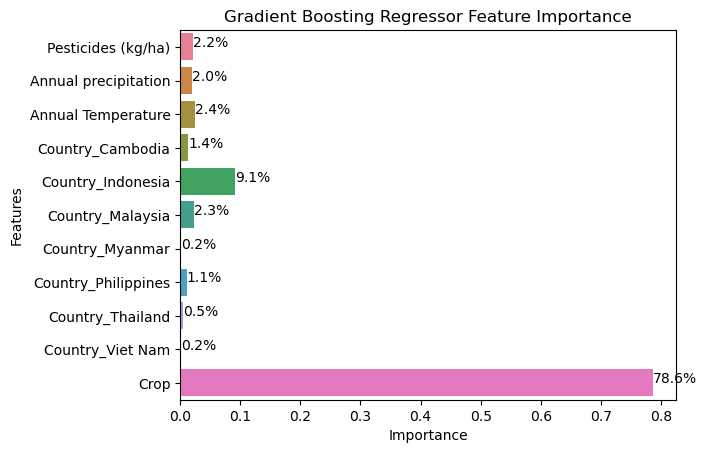

In [313]:
gbr_importance = pd.DataFrame(gbr.feature_importances_, index=gbr.feature_names_in_)

ax = sns.barplot(gbr_importance, x=gbr_importance[0], y=gbr_importance.index, hue=gbr_importance.index)
for index, value in zip(gbr_importance.index, gbr_importance[0]):
    ax.text(value, index, f"{value*100:.1f}%", color='black', ha='left')
plt.xlabel("Importance")
plt.ylabel("Features")

plt.title("Gradient Boosting Regressor Feature Importance")

plt.savefig('images/gbr_feature_importance.png', bbox_inches = 'tight')
plt.show()

For GradientBoosting Regressor, Crop is described as the most importance feature with 78.6% importance. This is a good inidcator for the model because different crops have different yield amounts and the model shows an emphasis on that. The model has a little bit of bias towards Indonesia. This might be due to yield amounts in Indonesia being a lot higher than other countries. Pesticides, Precipitation, and Temperature have an almost equal percentage of importance to the model as well.

### 5.3.2. Random Forest Regressor

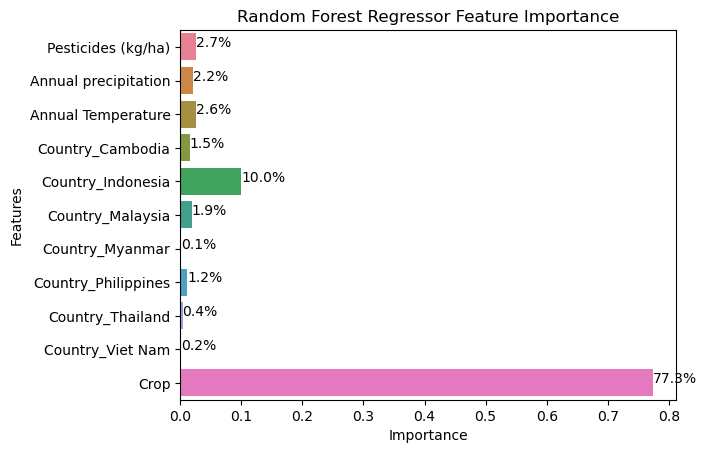

In [315]:
rfr_importance = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)

ax = sns.barplot(rfr_importance, x=rfr_importance[0], y=rfr_importance.index, hue=rfr_importance.index)
for index, value in zip(rfr_importance.index, rfr_importance[0]):
    ax.text(value, index, f"{value*100:.1f}%", color='black', ha='left')
plt.xlabel("Importance")
plt.ylabel("Features")

plt.title("Random Forest Regressor Feature Importance")

plt.savefig('images/rfr_feature_importance.png', bbox_inches = 'tight')
plt.show()

There's only a slight differences in feature importance between Random Forest Regressor and Gradient Boosting Regressor. RFR has 1% less of importance in Crop and a little bit increase for Indonesia. This makes RFR less preferrable than GBR. However, Pesticides, Precipitation, and Temperature has increased importance for about 0.2% each.

### 5.3.3. XGBoost Regressor

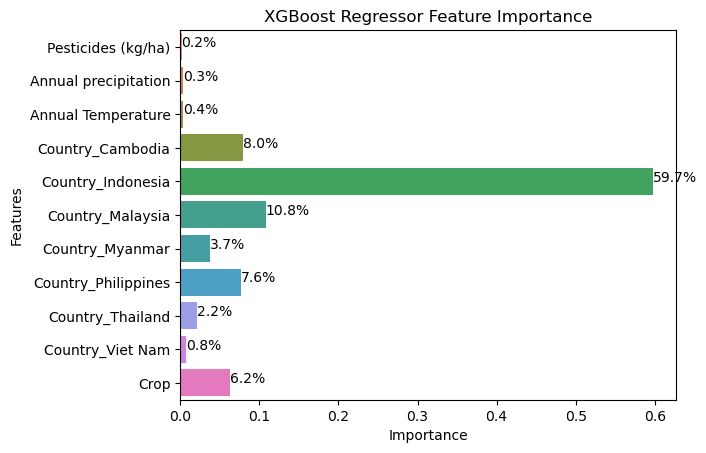

In [317]:
xgbr_importance = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_)

ax = sns.barplot(xgbr_importance, x=xgbr_importance[0], y=xgbr_importance.index, hue=xgbr_importance.index)
for index, value in zip(xgbr_importance.index, xgbr_importance[0]):
    ax.text(value, index, f"{value*100:.1f}%", color='black', ha='left')
plt.xlabel("Importance")
plt.ylabel("Features")

plt.title("XGBoost Regressor Feature Importance")

plt.savefig('images/xgbr_feature_importance.png', bbox_inches = 'tight')
plt.show()

XGBoost has so much difference in feature importance than the other two. The importance of crop is as low as 6.2% which I am not fond of. The model is emphasizing alot on each country rather than crop type or the environmental and pesticide factors.

### 5.3.4. Best Model Based on Feature Importance by Context

As the r2 score of the 3 models are not so different from each other, I have to decide based on how the model decides the importance of each feature. In the context of crop yield, the model should predict based on type of crop, the environmental and pesticide usage factors, and then the country producing it.\
XGBoost does terribly in the context of data because it is focusing on countries rather than the other features. Gradient Boosting and Random Forest have a similar perspective on deciding feature importance. Therefore I have to decide based on distribution of small percentages. By comparing both models, Gradient Boosting has less emphasis on countries than Random Forest. Therefore I decided to choose Gradient Boosting Regressor as the best model to predict crop yield for ASEAN countries.

# Conclusion

In this project, I have gathered data from different sources and combined them to predict crop yield for ASEAN countries based on various factors. I have discovered insights on top producing crops in ASEAN, and how the correlation between the yield, environmental and pesticide usage factors varies for each crop by analyzing 4 most consumed crops in the world.\
\
Various preprocessing techniques are applied the dataset to encode labels, and avoid bias towards high magnitude variables. I have also prepared 3 splits for the models to be trained and tested upon to find the best split where the models can generalize without overfitting nor underfitting.\
\
Different types of regression models are cross-validated upon 3 splits and models such as Gradient Boosting Regressor, Random Forest Regressor, and XGBoost Regressor came out on top. I performed hyperparameter tuning for these models to find the best parameters for them. After training and testing the models with the best parameters, all the models perform almost the same with the r2 score of about 94%. Therefore, I decided to choose the best model based on how they predict yield by looking at feature importance. XGBoost Regressor is emphasizing a lot on countries rather than other features therfore I decided not to choose it based on the context of the domain. Gradient Boosting and Random Forest have the similar feature importance but I decided to choose Gradient Boosting Regressor as the best model as it has less emphasis on countries than Random Forest Regressor.

# References

Masters, W.A., Djurfeldt, A.A., De Haan, C., Hazell, P., Jayne, T., Jirström, M. and Reardon, T. (2013). Urbanization and farm size in Asia and Africa: Implications for food security and agricultural research. Global Food Security, 2(3), pp.156–165. doi:https://doi.org/10.1016/j.gfs.2013.07.002. \
\
al-Saleh, I.A. (1994). Pesticides: a review article. Journal of environmental pathology, toxicology and oncology, [online] 13(3), pp.151–161. Available at: https://europepmc.org/article/med/7722882. \
\
Food and Agriculture Organization of the United Nations (2025). Pesticides Use. Available at: https://www.fao.org/faostat/en/#data/RP (Accessed 9th April 2025). \
\
Food and Agriculture Organization of the United Nations (2025). Land Use. Available at: https://www.fao.org/faostat/en/#data/RL (Accessed 9th April 2025). \
\
Food and Agriculture Organization of the United Nations (2025). Crops and livestock products. Available at: https://www.fao.org/faostat/en/#data/QCL (Accessed 9th April 2025). \
\
Our World in Data (2025). Annual precipitation. Available at: https://ourworldindata.org/grapher/average-precipitation-per-year?time=latest#explore-the-data (Accessed 9th April 2025). \
\
Palinatx (2024). Mean temperature for countries by year 1901-2022. Kaggle. Available at: https://www.kaggle.com/datasets/palinatx/mean-temperature-for-countries-by-year-2014-2022 (Accessed 9th April 2025). \
\
Patel R. (2022). Crop Yield Prediction Dataset. Kaggle. Available at: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset (Accessed 9th April 2025).\
\
Ijaz S. (2023). 15 Most Consumed Crops in the World. Yahoo Finance. Available at: https://finance.yahoo.com/news/15-most-consumed-crops-world-150822097.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAHxdfWdyulRxI52AX4MyLfc_8WQf4HoZWRveEB3h59xQu78U4vWQHmSLz5uVV4ho2GmfpUTQieoy-6y8qIVygE-apowq3uhIBsLcQBccFbOhFj1OC-vAwGGp82d-2Pxa2WBYFYoOQRxKrjpcgq5A7MpMjmVtXj9JWv6meQrJcTZJ (Accessed 14th April 2025).\
\
IBM (2024). Overfitting vs. Underfitting. Available at: https://www.ibm.com/think/topics/overfitting-vs-underfitting. (Accessed 18th April 2025).\
\
Amazon Web Services (2024). What is hyperparameter tuning? - hyperparameter tuning methods explained - AWS. Amazon Web Services, Inc. Available at: https://aws.amazon.com/what-is/hyperparameter-tuning/. (Accessed 19th April 2025)\
\
Navas, J. (2022). Anyscale - What is hyperparameter tuning? Anyscale. Available at: https://www.anyscale.com/blog/what-is-hyperparameter-tuning. (Accessed 19th April 2025)